# Chargement et comparaison des fichiers

## 1. Chargement

In [78]:
# Import Librairies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Chargement fichiers
assur_df = pd.read_excel("contrats_assur.xlsx")
deleg_df = pd.read_excel("contrats_deleg.xlsx")

# Aperçu
display(assur_df.head())
display(deleg_df.head())

,contrat_id,date_debut,date_fin,montant
0,ASSUR00001,2022-04-13,2023-04-13,9433
1,ASSUR00002,2022-12-15,2023-12-15,8513
2,ASSUR00003,2022-09-28,2023-09-28,3612
3,ASSUR00004,2022-04-17,2023-04-17,8041
4,ASSUR00005,2022-03-13,2023-03-13,7235


,contrat_id_deleg,date_debut,montant_deleg
0,ASSUR00025,2022-04-14,9578.0
1,ASSUR00036,2022-12-11,8808.0
2,ASSUR00047,2022-09-25,3139.0
3,ASSUR00031,2022-04-12,8160.0
4,ASSUR00044,2022-03-12,7290.0


## 2. Nettoyage et préparation

### Vérification des informations des deux fichiers

In [62]:
# Taille des fichiers
print(assur_df.shape)
print(deleg_df.shape)

(53, 4)
(53, 3)


In [63]:
# Informations sur le contenu des fichiers
print(assur_df.info())
print(deleg_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   contrat_id  53 non-null     object        
 1   date_debut  53 non-null     datetime64[ns]
 2   date_fin    53 non-null     datetime64[ns]
 3   montant     53 non-null     int64         
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 1.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   contrat_id_deleg  53 non-null     object        
 1   date_debut        51 non-null     datetime64[ns]
 2   montant_deleg     50 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 1.4+ KB
None


### Vérification et suppression des doublons

In [64]:
# Nombre de doublons
print("Nombre de doublons dans le fichier de l'assureur: ", assur_df.duplicated().sum(), "\n")
print("Nombre de doublons dans le fichier du délégataire: ", deleg_df.duplicated().sum())

Nombre de doublons dans le fichier de l'assureur:  3 

Nombre de doublons dans le fichier du délégataire:  0


In [65]:
# Suppression des doublons
assur_df_final = assur_df.drop_duplicates()
print(assur_df_final.shape)

deleg_df_final = deleg_df
print(deleg_df_final.shape)

(50, 4)
(53, 3)


### Vérification des données manquantes

In [66]:
# Nombre de données manquantes
print("Nombre de données manquantes dans le fichier de l'assureur: \n", assur_df_final.isna().sum(), "\n")
print("Nombre de données manquantes dans le fichier du délégataire: \n", deleg_df.isna().sum(), "\n")

Nombre de données manquantes dans le fichier de l'assureur: 
 contrat_id    0
date_debut    0
date_fin      0
montant       0
dtype: int64 

Nombre de données manquantes dans le fichier du délégataire: 
 contrat_id_deleg    0
date_debut          2
montant_deleg       3
dtype: int64 



## 3. Comparaison et identification des incohérences

### Fusion des fichiers

In [67]:
df = pd.merge(
    assur_df_final, 
    deleg_df_final, 
    left_on="contrat_id", 
    right_on="contrat_id_deleg", 
    how="outer", 
    indicator=True
)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   contrat_id        50 non-null     object        
 1   date_debut_x      50 non-null     datetime64[ns]
 2   date_fin          50 non-null     datetime64[ns]
 3   montant           50 non-null     float64       
 4   contrat_id_deleg  53 non-null     object        
 5   date_debut_y      51 non-null     datetime64[ns]
 6   montant_deleg     50 non-null     float64       
 7   _merge            55 non-null     category      
dtypes: category(1), datetime64[ns](3), float64(2), object(2)
memory usage: 3.3+ KB


In [72]:
df.head()

,contrat_id,date_debut_x,date_fin,montant,contrat_id_deleg,date_debut_y,montant_deleg,_merge,ecart_montant,ecart_date
0,ASSUR00001,2022-04-13,2023-04-13,9433.0,ASSUR00001,2022-09-23,7649.0,both,1784.0,-163.0
1,ASSUR00002,2022-12-15,2023-12-15,8513.0,ASSUR00002,2022-07-03,6325.0,both,2188.0,165.0
2,ASSUR00003,2022-09-28,2023-09-28,3612.0,ASSUR00003,2022-06-19,6063.0,both,-2451.0,101.0
3,ASSUR00004,2022-04-17,2023-04-17,8041.0,ASSUR00004,2022-05-27,8873.0,both,-832.0,-40.0
4,ASSUR00005,2022-03-13,2023-03-13,7235.0,ASSUR00005,2022-02-16,9677.0,both,-2442.0,25.0


### Incohérences

In [70]:
# Contrats non communs

## Fusion avec indicateur de fichier
compar = pd.merge(
    assur_df_final,
    deleg_df,
    how='outer',
    left_on='contrat_id',
    right_on='contrat_id_deleg',
    suffixes=('_assur', '_deleg'),
    indicator=True
)

## Affichage des contrats non appariés
contrats_abs_deleg = compar[compar['_merge'] == 'left_only']
contrats_abs_assur = compar[compar['_merge'] == 'right_only']

print("Contrats Assureur absents chez le délégataire :", len(contrats_abs_deleg))
print("Contrats Délégataire mais absents chez Assureur :", len(contrats_abs_assur))


Contrats Assureur absents chez le délégataire : 2
Contrats Délégataire mais absents chez Assureur : 5


In [73]:
print("Contrats Assureur absents chez le délégataire : \n")
display(contrats_abs_deleg)
print("\n Contrats Délégataire mais absents chez Assureur : \n")
display(contrats_abs_assur)

Contrats Assureur absents chez le délégataire : 



,contrat_id,date_debut_assur,date_fin,montant,contrat_id_deleg,date_debut_deleg,montant_deleg,_merge
38,ASSUR00039,2022-02-24,2023-02-24,3062.0,NaN,NaT,NaN,left_only
41,ASSUR00042,2022-05-11,2023-05-11,3568.0,NaN,NaT,NaN,left_only



 Contrats Délégataire mais absents chez Assureur : 



,contrat_id,date_debut_assur,date_fin,montant,contrat_id_deleg,date_debut_deleg,montant_deleg,_merge
50,NaN,NaT,NaT,NaN,ASSUR00139,2022-04-01,1332.0,right_only
51,NaN,NaT,NaT,NaN,ASSUR00142,2022-11-13,6955.0,right_only
52,NaN,NaT,NaT,NaN,ASSUR00143,2022-11-14,6956.0,right_only
53,NaN,NaT,NaT,NaN,ASSUR00144,2022-11-15,6957.0,right_only
54,NaN,NaT,NaT,NaN,ASSUR00145,2022-11-16,6958.0,right_only


### Ecarts de montants

In [74]:
# Contrats en commun
contrats_com = compar[compar['_merge'] == 'both'].copy()

# Ecart montants
contrats_com['ecart_m'] = contrats_com['montant'] - contrats_com['montant_deleg']

# Afficher les écarts significatifs (seuil à déterminer, par ex. > 100 euros)
seuil = 100
ecarts_signif = contrats_com[contrats_com['ecart_m'].abs() > seuil]

print("Contrats avec un écart de montant > 100€ :", len(ecarts_signif))
ecarts_signif[['contrat_id', 'montant', 'montant_deleg', 'ecart_m']]

Contrats avec un écart de montant > 100€ : 45


,contrat_id,montant,montant_deleg,ecart_m
0,ASSUR00001,9433.0,7649.0,1784.0
1,ASSUR00002,8513.0,6325.0,2188.0
2,ASSUR00003,3612.0,6063.0,-2451.0
3,ASSUR00004,8041.0,8873.0,-832.0
4,ASSUR00005,7235.0,9677.0,-2442.0
5,ASSUR00006,6486.0,2232.0,4254.0
6,ASSUR00007,8099.0,5870.0,2229.0
7,ASSUR00008,1775.0,2759.0,-984.0
9,ASSUR00010,4152.0,2122.0,2030.0
10,ASSUR00011,2585.0,4790.0,-2205.0


### Ecarts Date début

In [75]:
contrats_com['ecart_jours'] = (contrats_com['date_debut_assur'] - contrats_com['date_debut_deleg']).dt.days

# Afficher les écarts supérieurs à 3 jours
ecarts_date = contrats_com[contrats_com['ecart_jours'].abs() > 3]

print("Contrats avec un écart de date de début > 3 jours :", len(ecarts_date))
ecarts_date[['contrat_id', 'date_debut_assur', 'date_debut_deleg', 'ecart_jours']]

Contrats avec un écart de date de début > 3 jours : 46


,contrat_id,date_debut_assur,date_debut_deleg,ecart_jours
0,ASSUR00001,2022-04-13,2022-09-23,-163.0
1,ASSUR00002,2022-12-15,2022-07-03,165.0
2,ASSUR00003,2022-09-28,2022-06-19,101.0
3,ASSUR00004,2022-04-17,2022-05-27,-40.0
4,ASSUR00005,2022-03-13,2022-02-16,25.0
5,ASSUR00006,2022-07-08,2022-04-08,91.0
6,ASSUR00007,2022-01-21,2022-11-23,-306.0
7,ASSUR00008,2022-04-13,2022-05-13,-30.0
8,ASSUR00009,2022-05-02,2022-01-22,100.0
9,ASSUR00010,2022-08-03,2022-07-12,22.0


### Visualisation

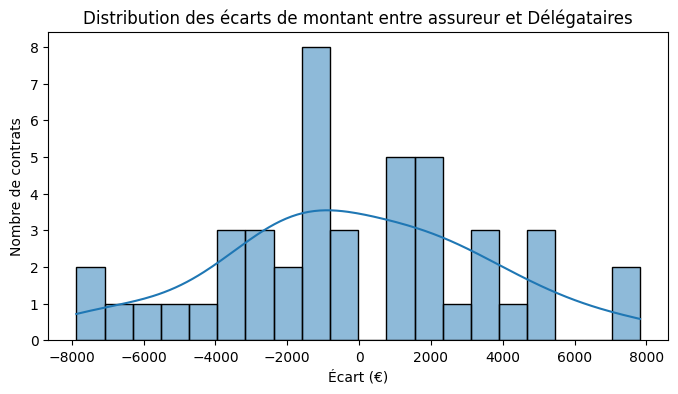

In [80]:
# Distribution des écarts de montant
plt.figure(figsize=(8, 4))
sns.histplot(contrats_com['ecart_m'], bins=20, kde=True)
plt.title("Distribution des écarts de montant entre assureur et Délégataires")
plt.xlabel("Écart (€)")
plt.ylabel("Nombre de contrats")
plt.show()

### Export fichiers incohérences

In [81]:
# Fichier Excel contenant les écarts de montants
ecarts_signif.to_excel("contrats_ecarts_montants.xlsx", index=False)

# Contrats absents chez le délégataire
contrats_abs_deleg.to_excel("contrats_abs_deleg.xlsx", index=False)

# Contrats absents chez l'assureur
contrats_abs_assur.to_excel("contrats_abs_assur.xlsx", index=False)